In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [3]:
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [4]:
duomenys = np.random.randint(1,10,5)
# naujo stulpelio ir duomenų pridėjimas
df['A'] = duomenys
print(df)

   A
0  6
1  6
2  9
3  3
4  9


In [5]:
duomenysB = np.random.randint(1,10,5)

df['B'] = duomenysB

print(df)

   A  B
0  6  8
1  6  5
2  9  7
3  3  6
4  9  4


In [6]:
#  duomenų apžvalga:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       5 non-null      int64
 1   B       5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [7]:
# apžvalga
df.head(2)

,A,B
0,6,8
1,6,5


In [8]:
df.tail(2)

,A,B
3,3,6
4,9,4


In [9]:
cols = list(df.columns)
print(cols)

['A', 'B']


In [10]:
for i in cols:
    print(i)

A
B


In [11]:
# duomenų nuskaitymas
df14 = pd.read_csv('../DATA/DUS2014.csv') # pas jus ../../DATA
df14.head(2)

,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,nuosavybe,bdu_val,nuts,vv_darb_sk,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,35.03,0,0.58,XL,0,1_49,20-29,0,A,0,...,B,6.0,LT,6,0,0,6.0,0,1,G4
1,2.39,0,0.54,XN,0,1_49,20-29,0,A,0,...,B,6.0,LT,12,0,0,6.0,0,2,G2


In [12]:
A = 7
B = 5
print(A)
print(B)

7
5


In [13]:
issilavinimas = df14['issilavinimas'] # čia Series objektas - 2 įrašai visada
print(issilavinimas)

0        G4
1        G2
2        G4
3        G4
4        G2
         ..
44947    G4
44948    G4
44949    G4
44950    G4
44951    G4
Name: issilavinimas, Length: 44952, dtype: object


In [14]:
#  series objektui index ir values:
indeksai = issilavinimas.index
print(indeksai)

RangeIndex(start=0, stop=44952, step=1)


In [15]:
vertes = issilavinimas.values
print(vertes)

['G4' 'G2' 'G4' ... 'G4' 'G4' 'G4']


In [16]:
lytis = df14['lytis'].values
print(lytis)

['M' 'F' 'F' ... 'F' 'F' 'F']


In [17]:
df = df14[['lytis', 'issilavinimas', 'amzius', 'bdu_spalio', 'profesija']]
df.head()

,lytis,issilavinimas,amzius,bdu_spalio,profesija
0,M,G4,20-29,6.00,261
1,F,G2,20-29,6.00,334
2,F,G4,40-49,6.00,221
3,F,G4,30-39,6.00,332
4,M,G2,40-49,11.33,962


In [18]:
df_f = df[(df['lytis'] == 'F') | (df['issilavinimas'] == 'G4')]
df_f.head()

,lytis,issilavinimas,amzius,bdu_spalio,profesija
0,M,G4,20-29,6.0,261
1,F,G2,20-29,6.0,334
2,F,G4,40-49,6.0,221
3,F,G4,30-39,6.0,332
6,M,G4,60+,6.0,221


In [19]:
df_f['bdu_spalio'].median()

1892.0

In [20]:
df_f['bdu_spalio'].mean()

2386.9000860843166

In [21]:
df_f['bdu_spalio'].max()

62215.0

In [22]:
df.query(expr='lytis == "F" and issilavinimas == "G4"')

,lytis,issilavinimas,amzius,bdu_spalio,profesija
2,F,G4,40-49,6.00,221
3,F,G4,30-39,6.00,332
12,F,G4,30-39,6.00,241
14,F,G4,50-59,17.00,263
34,F,G4,40-49,9.67,121
...,...,...,...,...,...
44947,F,G4,50-59,3393.00,235
44948,F,G4,30-39,3639.67,233
44949,F,G4,50-59,3670.00,231
44950,F,G4,30-39,4212.00,231


In [23]:
edu = ['G1', 'G2']
for e in edu:
    print(df.query(expr='issilavinimas == @e'))

      lytis issilavinimas amzius  bdu_spalio  profesija
8         M            G1  20-29        6.67        912
51        M            G1  20-29      160.33        962
68        F            G1  30-39     1041.00        524
70        M            G1  14-19     1061.00        752
89        M            G1  40-49      418.67        932
...     ...           ...    ...         ...        ...
41133     M            G1  40-49     2978.00        541
41204     M            G1  50-59     1781.00        821
41247     F            G1  30-39     1267.67        322
41478     F            G1  50-59     2135.67        222
41509     F            G1  50-59     2144.00        322

[1716 rows x 5 columns]
      lytis issilavinimas amzius  bdu_spalio  profesija
1         F            G2  20-29        6.00        334
4         M            G2  40-49       11.33        962
5         M            G2  30-39        6.00        122
7         F            G2  20-29       13.33        531
9         M            

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
df['€'] = df['bdu_spalio']/3.4528
df.head()

,lytis,issilavinimas,amzius,bdu_spalio,profesija,€
0,M,G4,20-29,6.00,261,1.737720
1,F,G2,20-29,6.00,334,1.737720
2,F,G4,40-49,6.00,221,1.737720
3,F,G4,30-39,6.00,332,1.737720
4,M,G2,40-49,11.33,962,3.281395


In [26]:
# Išssilavinimo pakopos yra G1,G2,G3 ir G4. 
# Parašykite ciklą, kuris išspausdintų pakopos kodą ir 
# spalio atlyginų medianą bei vidurkį, atskirai 
# vyrams, atskirai moterims.

In [27]:
edu = ['G1','G2', 'G3', 'G4']

for e in edu:
    fv = df.query(expr='issilavinimas == @e and lytis == "F"')['bdu_spalio'].mean()
    fm = df.query(expr='issilavinimas == @e and lytis == "F"')['bdu_spalio'].median()
    print(f'{e:5}|{fv:5.2f}|{fm:5.2f}|{"Mot":5}')

for e in edu:
    fv = df.query(expr='issilavinimas == @e and lytis == "M"')['bdu_spalio'].mean()
    fm = df.query(expr='issilavinimas == @e and lytis == "M"')['bdu_spalio'].median()
    print(f'{e:5}|{fv:5.2f}|{fm:5.2f}|{"Vyr":5}')

G1   |1406.67|1256.50|Mot  
G2   |1571.05|1395.00|Mot  
G3   |2190.46|1974.00|Mot  
G4   |3039.67|2691.84|Mot  
G1   |1762.30|1485.66|Vyr  
G2   |2129.49|1884.00|Vyr  
G3   |2900.46|2500.00|Vyr  
G4   |4158.56|3400.00|Vyr  


M 22586
F 22366


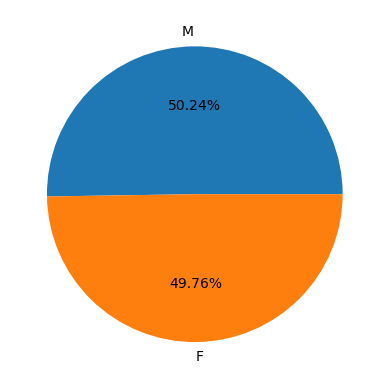

In [34]:
# value_counts()

c = df['lytis'].value_counts()
lytys = c.index
kiekiai = c.values

for li, ci in zip(lytys, kiekiai):
    print(li, ci)

plt.pie(x=c.values, labels=c.index, autopct='%.2f%%')

plt.show()

# parašykime ciklą, kuris surastų kiek vyrų ir moterų dalyvavo apklausoje
#  atvaizduokime procentiškai su pie plot tai

In [39]:
edus = df['issilavinimas'].value_counts().sort_index(ascending=True).index.to_list()
print(edus)
for e in edus:
    d = df.query('issilavinimas == @e')['bdu_spalio'].mean()
    print(e, d)

['G1', 'G2', 'G3', 'G4']
G1 1639.1983275058276
G2 1877.952304728229
G3 2521.961990474626
G4 3494.114123791532


In [29]:
# Parašykite ciklą, kuris surašytų atlyginimų vidurkius bei medianas
# pagal amžiaus grupes (2014 metams, eurais)
#  amžiaus grupes gaukite naudodamiesi value_counts()
# tvarkingesniam atvaizdavimui pasinaudokite f-strings
# išvestyje pridėkite dar ir skirtumą tarp vidurkio ir medianos (vidurkis-mediana)

In [30]:
# value_counts() ir pie plot:
#  kiek procentų buvo vyrų, moterų 2014 metais?
#  kiek procentų buvo iš kiekvienos amžiaus grupės?
#  kiek procentų buvo iš kiekvienos išsilavinimo pakopos?
#  kiek respondentų buvo iš privataus (B) bei viešojo (A) sektoriaus? (stulpelis: nuosavybe)
# kiek procentaliai buvo vyrų, moterų iš didelių, vidutinių, mažų įmonių? (Stulpelis im_dydis, 
# du pie plot'ai, vienas vyrams, kitas moterims)